In [1]:
#The imports
import urllib.request as urll
import os, sys
import json
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import DataFrame as df
from pandas.io.json import json_normalize

In [16]:
# to imbed plots, prevents pop-up windows for plots
%matplotlib inline

In [2]:
tFolder = r"C:\Users\AngelSparkles\Python"

In [3]:
url = r'http://services.arcgis.com/BG6nSlhZSAWtExvp/arcgis/rest/services/'\
       'Countries_World_Demog/FeatureServer/0/query?where=POP2015+%3E+10000000'\
       '&objectIds=&time=&geometry=&geometryType=esriGeometryEnvelope&inSR=4326'\
       '&spatialRel=esriSpatialRelIntersects&resultType=none&distance='\
       '&units=esriSRUnit_Meter&outFields=*&returnGeometry=true&returnCentroid=false'\
       '&multipatchOption=&maxAllowableOffset=&geometryPrecision=&outSR='\
       '&returnIdsOnly=false&returnCountOnly=false&returnExtentOnly=false'\
       '&returnDistinctValues=false&orderByFields=&groupByFieldsForStatistics='\
       '&outStatistics=&resultOffset=&resultRecordCount=&returnZ=false'\
       '&returnM=false&quantizationParameters=&sqlFormat=none&f=pjson&token='

In [4]:
def url2File(url,filename,tries=5):
   successFlag = False
   counter=1
   while counter <= tries:
       response = urll.urlopen(url, timeout =3)
       if response:
           content =  response.read().decode(response.headers.get_content_charset())
           file = open(filename,'w')
           file.write(content)
           file.close()
           successFlag = True
           break
       else:
           counter+=1
   return successFlag

In [5]:
def loadJSON(filename):
    jdat = open(filename)
    data = json.load(jdat)
    return data

In [6]:
def json2pandas(data): 
   #takes loaded json data and converts it into a pandas data frame
   geoType = data['geometryType']
   s = json_normalize(data['features'])
   #now separate the attributes from the Geometry so that it runs faster
   col = s.columns
   #the last coliumn is always the geometry
   sAtt = s.loc[:,col[0:len(col)-2]]
   #fix the columns
   newCol = []
   for i in col[0:len(col)-2]:
       this = i.replace('attributes.','')
       newCol.append(this)
   sAtt.columns = newCol
   sUniq = s['attributes.OBJECTID_1']
   sGeo = s.loc[:,col[len(col)-1]]
   sGeo = pd.concat([sGeo,sUniq],axis=1)
   return sAtt, sGeo


In [7]:
outFile = os.path.join(tFolder,'test.json')
print(outFile)
s = url2File(url,outFile)
if s:
    print("downloaded")
    data = loadJSON(outFile)

C:\Users\AngelSparkles\Python\test.json
downloaded


In [8]:
A,G = json2pandas(data)

In [15]:
A

,CNTRY_NAME,LONG_NAME,OBJECTID_1,POP2007,POP2015,POP2025,POPC_0725
0,Venezuela,Bolivarian Republic of Venezuela,9,26084662,28849895,32060880,5976218
1,Argentina,Argentine Republic,19,40301927,43071608,45757375,5455448
2,Bolivia,Republic of Bolivia,20,9119152,10121046,11369857,2250705
3,Brazil,Federative Republic of Brazil,21,190010647,204057039,217825222,27814575
4,Chile,Republic of Chile,22,16284741,17396302,18521153,2236412
5,Ecuador,Republic of Ecuador,23,13755680,15205799,17099305,3343625
6,Peru,Republic of Peru,25,28674757,31458638,34476469,5801712
7,Canada,Canada,28,33390141,35653360,38164606,4774465
8,Guatemala,Republic of Guatemala,29,12728111,14918999,17564073,4835962
9,Mexico,United Mexican States,32,108700891,118689157,130198692,21497801


In [18]:
A.index_col='CNTRY_NAME'

In [44]:
A.sort(['POPC_0725'])

C:\Anaconda3\envs\coursework_py35\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,CNTRY_NAME,LONG_NAME,OBJECTID_1,POP2007,POP2015,POP2025,POPC_0725
29,Russia,Russian Federation,104,141377752,136009988,128180396,-13197356
62,Japan,Japan,187,127467972,125761937,120001048,-7466924
49,Ukraine,Ukraine,161,46299862,44008507,41037583,-5262279
79,South Africa,Republic of South Africa,220,43997828,42260643,39905523,-4092305
36,Italy,Italian Republic,125,58147733,57689321,56234163,-1913570
45,Germany,Federal Republic of Germany,148,82400996,81945895,80637451,-1763545
42,Poland,Republic of Poland,142,38518241,38301885,37349696,-1168545
48,Romania,Romania,160,22276056,21960898,21260138,-1015918
19,Spain,Kingdom of Spain,82,40448191,40481759,39578066,-870125
41,Czech Republic,Czech Republic,139,10228744,10129510,9844275,-384469


C:\Anaconda3\envs\coursework_py35\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


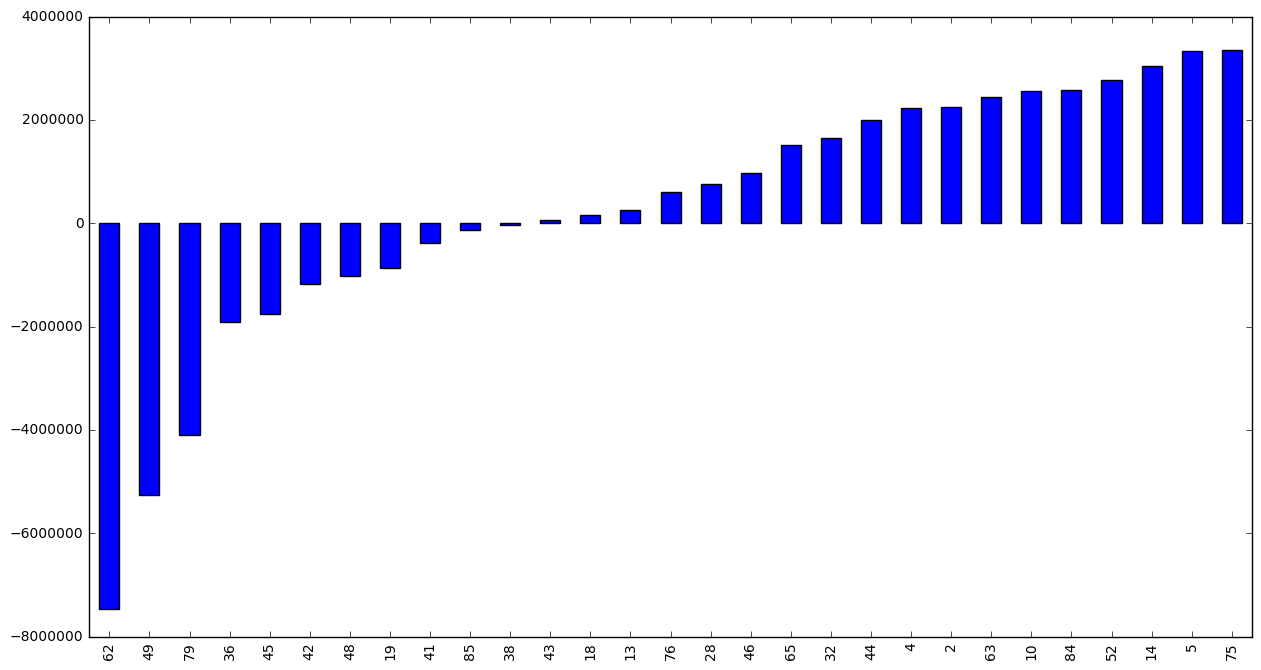

In [49]:
A.sort(['POPC_0725'])[1:30]['POPC_0725'].plot(kind='bar',figsize=(15,8))

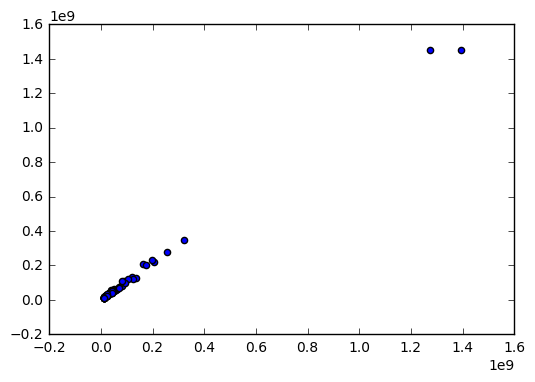

In [28]:
plt.scatter(A.POP2015,A.POP2025)

<Container object of 86 artists>

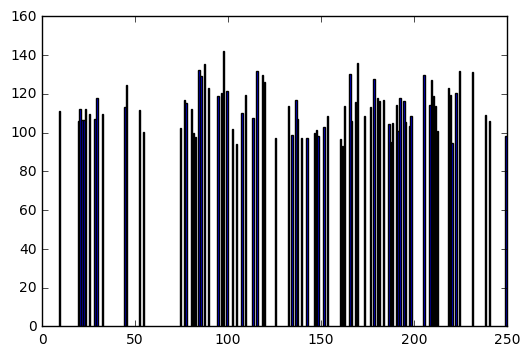

In [32]:
plt.bar(A.OBJECTID_1,((A.POP2025/A.POP2015)*100))
plt.axes()

In [52]:
G.head()

,geometry.rings,attributes.OBJECTID_1
0,"[[[-6225521.664132, 1135229.45410467], [-62228...",9
1,"[[[-6217287.78458583, -4378840.30051248], [-62...",19
2,"[[[-5760558.84436767, -2187058.76001266], [-57...",20
3,"[[[-4217142.94133686, -194202.527804671], [-42...",21
4,"[[[-6224712.1476145, -4666479.89423684], [-622...",22


In [85]:
G.columns=['geometry','OBJECTID_1']

In [86]:
G.head()

,geometry,OBJECTID_1
0,"[[[-6225521.664132, 1135229.45410467], [-62228...",9
1,"[[[-6217287.78458583, -4378840.30051248], [-62...",19
2,"[[[-5760558.84436767, -2187058.76001266], [-57...",20
3,"[[[-4217142.94133686, -194202.527804671], [-42...",21
4,"[[[-6224712.1476145, -4666479.89423684], [-622...",22


In [103]:
for shape in G.geometry[1:2]:
    for coord in shape:
        print(coord)
        print(r'\n\n')

[[-6217287.78458583, -4378840.30051248], [-6217284.95743521, -4372932.59032468], [-6219744.40776246, -4368380.85960923], [-6221577.78233954, -4366056.79348584], [-6228739.34143544, -4357112.83965744], [-6234425.71200426, -4348726.35639183], [-6233541.15136899, -4346011.41780184], [-6231555.8592448, -4343901.29806511], [-6230280.96621344, -4342163.82516761], [-6229253.68614402, -4339883.1096721], [-6228895.77253772, -4335357.99400295], [-6229896.7008847, -4332467.23961378], [-6230988.59604563, -4328036.98000992], [-6229898.18676339, -4315032.47265549], [-6228006.16808131, -4315186.58053436], [-6225474.59019864, -4317026.94326172], [-6223860.22870105, -4316585.61701917], [-6223255.37023677, -4314553.61262026], [-6222211.61822822, -4307141.53783038], [-6223811.14309675, -4303158.71541465], [-6227344.5555541, -4301251.49208668], [-6228065.3078517, -4303733.06585742], [-6236100.04838523, -4297740.40587947], [-6239726.88606435, -4293367.58349738], [-6240249.12202372, -4283869.0303802], [-623

In [66]:
G.columns

Index(['geometry.rings', 'attributes.OBJECTID_1'], dtype='object', name=['geometry', 'OBJECTID_1'])